In [129]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_style("ticks")

In [130]:
print(len(data))
data = pd.read_csv('extracted_log-minibatch10-2.csv')

#data['kfold'] = '/content/drive/My Drive/logs/kfold'
data['free_energy_subtract'] = data['measure/evaluate/Free/mean_free_energy_train'] - data['measure/evaluate/Free/mean_free_energy_validation']
data.index = data['step']
data.head(5)

255


,evaluate,wall_time,step,measure/reconstruction/hamming,details/measure/top-1/evaluate-0/train,details/measure/top-1/evaluate-0/validation,details/measure/top-1/evaluate-1/train,details/measure/top-1/evaluate-1/validation,details/measure/top-1/evaluate-2/train,details/measure/top-1/evaluate-2/validation,...,batch_size,class,visible_size,hidden_size,regularization,learning_rate,sampling_method,momentum,path,free_energy_subtract
step,,,,,,,,,,,,,,,,,,,,,
1,0,1.557085e+09,1,3.073753,0.300072,0.358382,0.096168,0.092486,0.126537,0.086705,...,10,RBMCF,702,1000,NoRegularization-0.0,Adam-0.05-0.9-0.999-1e-08,CD-1,0,kfold=2/kfold-intern=0/batch_size=10/class=RBM...,-0.063923
2,1,1.557085e+09,2,3.026753,0.300072,0.358382,0.096168,0.092486,0.126537,0.086705,...,10,RBMCF,702,1000,NoRegularization-0.0,Adam-0.05-0.9-0.999-1e-08,CD-1,0,kfold=2/kfold-intern=0/batch_size=10/class=RBM...,-0.184673
3,2,1.557085e+09,3,3.053507,0.300072,0.358382,0.096168,0.092486,0.126537,0.086705,...,10,RBMCF,702,1000,NoRegularization-0.0,Adam-0.05-0.9-0.999-1e-08,CD-1,0,kfold=2/kfold-intern=0/batch_size=10/class=RBM...,-0.285982
4,3,1.557085e+09,4,3.025307,0.300072,0.358382,0.096168,0.092486,0.126537,0.086705,...,10,RBMCF,702,1000,NoRegularization-0.0,Adam-0.05-0.9-0.999-1e-08,CD-1,0,kfold=2/kfold-intern=0/batch_size=10/class=RBM...,-0.305215
5,4,1.557085e+09,5,2.985539,0.300072,0.358382,0.096168,0.092486,0.140998,0.098266,...,10,RBMCF,702,1000,NoRegularization-0.0,Adam-0.05-0.9-0.999-1e-08,CD-1,0,kfold=2/kfold-intern=0/batch_size=10/class=RBM...,-0.266624


In [131]:
columns = data.columns[data.columns.str.contains('validation')]

for i in range(5):
    #path = data[(data['hidden_size'] == 1000) & (data['kfold'] == i)]['path'].unique()[1]
    #path
    data_filtered = data[(data['hidden_size'] == 1000) & (data['kfold'] == i)]# & (data['path'] == path)]
    data_filtered[columns][columns[0:6]]#.mean(axis=1).plot()
    #print(data_filtered[columns][columns[0:6]].max(axis=0))
    print(data_filtered[columns][columns[0:6]].max(axis=0).mean())

print(data[(data['hidden_size'] == 1000)].groupby('kfold')[columns[0:6]].max().mean().agg(['mean', 'std']))
print(data[(data['hidden_size'] == 1000)].groupby('kfold')[columns[7:7+6]].max().mean().agg(['mean', 'std']))

0.3651252364118894
0.36512523889541626
0.3641618564724922
0.3646435464421908
0.3656069338321686
mean    0.364933
std     0.152902
dtype: float64
mean    0.545954
std     0.136153
dtype: float64


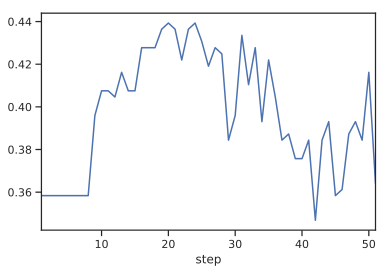

In [133]:
#path = data[(data['hidden_size'] == 1000) & (data['kfold'] == 0)]['path'].unique()[1]
#path
data_filtered[columns[0]].plot()

In [162]:
data.groupby('kfold')[columns[0:6]].max()
data[['kfold'] + list(columns[0:6])].groupby('kfold').mean()#.plot()

data['meandata'] = data[columns[0:6]].mean(axis=1)
data.groupby('kfold').idxmax()['meandata']

kfold
0    23.0
1    22.0
2    26.0
3    24.0
4    35.0
Name: meandata, dtype: float64